Topic Modelling

In [23]:
import spacy
import re
import spacy_transformers
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import torch

import json

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

import numpy as np
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
nlp = spacy.load('de_dep_news_trf')

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

/home/somber/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'de_dep_news_trf' (3.3.0) was trained with spaCy v3.3 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package stopwords to /home/somber/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    replacers.replace_punctuation_token,
    mutators.mutate_lemma_token,
)

In [25]:
with open('BundestagsReden.json') as json_file:
    data = json.load(json_file)

Lowercase is already done during forming dictionary

In [26]:
print(data['ID20100600'][1])

sehr geehrter herr alterspräsident dr. schäuble! also, herr brandner, gleich in der ersten sitzung die braune widerlichkeitsskala in solche höhen zu treiben,das ist immerhin respektvoll.dass ausgerechnet sie willy brandt zitieren, der gegen die nazis gekämpft hat, der niedergekniet ist vor den opfern des aufstandes im warschauer ghetto, dass ausgerechnet sie, die in der tradition der nazis stehen,das hier anbringen, ist abartig, um das in aller klarheit zu sagen. abartig und ekelerregend!liebe kolleginnen und kollegen, sehr geehrte damen und herren von der afd,wenn ich mir die politische lage angucke, dann finde ich zurzeit besonders wichtig: wie entwickelt sich corona? ich finde es wichtig, darüber zu diskutieren, wie wir kinderarmut bekämpfen können. und ich mache mir große sorgen, dass sich hier eine koalition anbahnt, in der das soziale hinten runterfallen wird, weil die stabil marktradikale fdp dafür schon sorgen wird.das ist etwas, was mich und viele menschen bewegt.was ist der a

In [27]:
doc = nlp(data['ID20100600'][1].replace('–', ''))

Tokenize

In [29]:
for token in doc:
    if (not token.is_punct 
    and not token.is_currency
    and not token.is_digit
    and not token.is_space
    and not token.is_stop
    and not token.like_num):
        print(token.lemma_)

geehrt
Herr
Alterspräsident
dr
Schäuble
Herr
Brandner
Sitzung
braun
Widerlichkeitsskala
Höhe
treiben
immerhin
respektvoll.dass
ausgerechnet
Willy
Brandt
zitieren
Nazi
kämpfen
niederknieen
Opfer
Aufstand
Warschauer
Ghetto
ausgerechnet
Tradition
Nazi
stehen
anbringen
abartig
Klarheit
sagen
abartig
ekelerregend
lieb
Kollegin
Kollege
geehrt
Dame
Herren
afd
politisch
Lage
angucken
finden
zurzeit
wichtig
entwickeln
Corona
finden
wichtig
diskutieren
Kinderarmut
bekämpfen
machen
Sorge
Koalition
anbahnen
sozial
hinten
runterfallen
stabil
marktradikal
FDP
sorgen
wird.das
Mensch
bewegt.was
afd
wichtig
afd
wichtig
Verunglimpfung
geschlechtergerecht
Sprache
einzig
sinnvoll
Änderungsantrag
sehen
parlamentarisch
verblödet
eigentlich
mal
sagen
Änderungsantrag
einzig
erkennen
offenbar
Bundestag
Gesetzestext
lesen
binnen-i
doppelpunkte
gendersternchen.das
absurd
beantragen
Gesetzestext
völlig
Papierkorb
vorlegen
Fraktion
Vorlage
sozialdemokratisch
Fraktion
unterstützen
halten
Geschäftsordnung
Grundlage


In [30]:
for token in doc:
    print(token.lemma_)

sehr
geehrt
Herr
Alterspräsident
dr
.
Schäuble
--
also
--
Herr
Brandner
--
gleich
in
der
erster
Sitzung
der
braun
Widerlichkeitsskala
in
solcher
Höhe
zu
treiben
--
der
sein
immerhin
respektvoll.dass
ausgerechnet
sie
Willy
Brandt
zitieren
--
der
gegen
der
Nazi
kämpfen
haben
--
der
niederknieen
sein
vor
der
Opfer
der
Aufstand
in
Warschauer
Ghetto
--
dass
ausgerechnet
sie
--
der
in
der
Tradition
der
Nazi
stehen
--
der
hier
anbringen
--
sein
abartig
--
um
der
in
aller
Klarheit
zu
sagen
--
abartig
und
ekelerregend
--
lieb
Kollegin
und
Kollege
--
sehr
geehrt
Dame
und
Herren
von
der
afd
--
wenn
ich
sich
der
politisch
Lage
angucken
--
dann
finden
ich
zurzeit
besonders
wichtig
--
wie
entwickeln
sich
Corona
--
ich
finden
es
wichtig
--
darüber
zu
diskutieren
--
wie
wir
Kinderarmut
bekämpfen
können
--
und
ich
machen
mir
groß
Sorge
--
dass
sich
hier
ein
Koalition
anbahnen
--
in
der
der
sozial
hinten
runterfallen
werden
--
weil
der
stabil
marktradikal
FDP
dafür
schon
sorgen
wird.das
sein
etwas
--
we

def preprocessing (textToProcess):
    #tokenize
    #remove special characters
    #remove stopwords
    #lemmata
    processedText = pipeline.clean(textToProcess)
    return processedText

In [31]:
#iterate over all texts
alltexts = []
tokenized_corpus = []
for key in data:
    nowhitespacetext = re.sub('\s+',' ',data[key][1])
    alltexts.append(nowhitespacetext.replace(".", " ").replace(",", " ").replace(r" *", " ").replace("  ", " ").replace("– ",""))

In [32]:
print(alltexts[0])

sehr geehrter herr alterspräsident! so muss ich es jetzt sagen genau; ich muss mich daran gewöhnen nicht lange nicht lange; da haben sie schon recht liebe kolleginnen und kollegen! meine sehr geehrten damen und herren! die übernahme der geschäftsordnung ist eine der ersten wichtigen entscheidungen die wir heute zu beginn der wahlperiode treffen müssen die geschäftsordnung ist grundlage für unsere gemeinsame arbeit sie hat sich über viele wahlperioden bewährt und wird uns auch durch die neue wahlperiode tragen es ist gute tradition dass wir die geschäftsordnung am anfang einer wahlperiode mit breiter parlamentarischer mehrheit übernehmen und das sollten wir auch heute tun sie ist nicht in stein gemeißelt das wissen diejenigen die bereits in der letzten wahlperiode hier im bundestag tätig waren sondern die geschäftsordnung ist immer ein ich sage mal lebendiges dokument das sich den gegebenheiten des parlamentarismus aber auch den gegebenheiten der arbeit hier im deutschen bundestag anpas

In [33]:
for i, text in enumerate(alltexts):
    if text.find("me cfs") != -1:
        print("gefunden")
    if text.find("me/cfs") != -1:
        print("gefunden2")
    if text.find("me-cfs") != -1:
        print("gefunden3")
    if text.find(" me ") != -1:
        print("gefunden4", text)

gefunden2
gefunden2
gefunden2
gefunden4 sehr geehrte frau präsidentin! sehr geehrte damen und herren! lieber kollege stefinger ich bin erstaunt wie wenig sie diesem parlament zutrauen wir haben den haushalt noch gar nicht verabschiedet wir sitzen hier damit wir alle gemeinsam für die guten dinge und die guten ziele kämpfen und das werden wir im november entscheiden „let me learn!“ „lass mich lernen!“ das forderten weltweit jugendvertreter/‑innen und jugendbotschafter/-innen am wochenende stellvertretend für ihre generation beim bildungsgipfel der vereinten nationen in new york bildung ist ein menschenrecht in der realität ist sie jedoch ein privileg wir lassen viele kinder und jugendliche dieser welt nicht lernen; dieses in den sdgs und in der kinderrechtskonvention verankerte recht bleibt ihnen verwehrt bereits vor der coronapandemie hatten wir es mit einer bildungskrise zu tun; denn rund die hälfte der zehnjährigen kinder war nicht in der lage eine einfache geschichte zu lesen und si

In [34]:
extra_stops = ["tja","bereich", "wichtig", "herr", "frau", "kollegin", "kollege", "dame", "mal", "geehrte", "geehrt", "nächster", "redner", "lieb", "lieber", "liebe", "fraktionskollegin", "fraktionskollege", "lm", "sagen", "antrag", "letzter", "frage", "präsidentin", "wort"] 

In [35]:
# Laufzeit: ~1:45 Stunden
# 2. Laufzeit: 4 Stunden???
stop_words = set (stopwords.words("german"))
tokenized_corpus = []
for texts in alltexts:
    doc = nlp(texts)
    tokenized_texts = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num and token.lemma_.lower() not in stop_words and token.lemma_.lower() not in extra_stops and (token.pos_ == "NOUN" or token.pos_ == "PROPN"):
            tokenized_texts.append(token.lemma_.lower())
    
    tokenized_corpus.append(tokenized_texts)

In [36]:
words_id = corpora.Dictionary(tokenized_corpus)
corpus = [words_id.doc2bow(txt) for txt in tokenized_corpus]

In [111]:
k_init = 10
k_final = 25

In [112]:
for k in range(k_init,k_final+1):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=words_id, num_topics = k, random_state=50, passes=40, per_word_topics=True)

    per_lda = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=words_id, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(k,per_lda,coherence_lda)

10 -9.023489059464659 0.49145697587328285
11 -9.220521102189455 0.5133971455145185
12 -9.419564411720163 0.49422386042861804
13 -9.586863627744888 0.5410719444473128
14 -9.7262448375729 0.5299777401062108
15 -9.849687334543313 0.5150894692902438
16 -9.962788641251775 0.543503398109923
17 -10.060591327919173 0.5261078631244478
18 -10.166932863055017 0.5601675461794763
19 -10.28035089478596 0.5221244363036371
20 -10.39339150370246 0.5333466953919006
21 -10.500746918691707 0.5128770267704991
22 -10.599713569412463 0.5433951936591307
23 -10.703950540932944 0.5490276796328728
24 -10.827547899650893 0.523066335326212
25 -10.923928540204747 0.5187488399672823


In [37]:
#Laufzeit: ~2 min
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=words_id, num_topics = 23, random_state=50, passes=40, per_word_topics=True)

In [38]:
lda_model.show_topics(num_words=20, num_topics=23)

[(0,
  '0.037*"land" + 0.020*"kommune" + 0.019*"bund" + 0.015*"digitalisierung" + 0.014*"thema" + 0.010*"deutschland" + 0.009*"ort" + 0.009*"infrastruktur" + 0.009*"stelle" + 0.008*"bundesregierung" + 0.007*"sport" + 0.007*"projekt" + 0.007*"aufgabe" + 0.007*"bundespolizei" + 0.006*"koalitionsvertrag" + 0.006*"punkt" + 0.006*"nachfrage" + 0.006*"herausforderung" + 0.006*"programm" + 0.005*"möglichkeit"'),
 (1,
  '0.021*"pflege" + 0.018*"beschäftigter" + 0.013*"ausbildung" + 0.012*"arbeitsbedingung" + 0.012*"mensch" + 0.011*"versorgung" + 0.010*"problem" + 0.010*"system" + 0.010*"beruf" + 0.009*"pflegekräfte" + 0.008*"patient" + 0.008*"gesundheitswesen" + 0.007*"personal" + 0.007*"fachkräftemangel" + 0.007*"reform" + 0.006*"finanzierung" + 0.006*"krankenhäuser" + 0.006*"koalitionsvertrag" + 0.006*"leistung" + 0.006*"arbeit"'),
 (2,
  '0.028*"einsatz" + 0.026*"soldat" + 0.025*"mandat" + 0.024*"mali" + 0.021*"region" + 0.015*"engagement" + 0.012*"mission" + 0.012*"ort" + 0.012*"soldatinne

'\nfrom gensim.test.utils import datapath\nimport gensim.models.ldamodel\ntemp_file = datapath("model_clara")\nlda_model = gensim.models.ldamodel.LdaModel.load(temp_file)\n'

In [41]:
lda_model[corpus[5500]]

([(0, 0.13544902),
  (11, 0.084021956),
  (13, 0.34246373),
  (15, 0.226902),
  (17, 0.05958881),
  (18, 0.05948152),
  (19, 0.024314813),
  (22, 0.061108805)],
 [(7, [11, 17, 18, 13]),
  (13, [11, 13, 18, 17, 22, 19]),
  (20, [13, 0, 22, 11]),
  (26, [13, 11, 22, 17, 19, 0]),
  (52, [11, 13, 22, 17, 19, 18]),
  (60, [11, 13, 17, 19]),
  (70, [13, 0, 18, 22, 11, 19]),
  (85, [13, 18, 11, 0, 19, 17, 22]),
  (197, [0, 22, 13, 17, 18, 19]),
  (213, [13, 18, 19]),
  (214, [13, 0, 22, 11, 18, 17]),
  (217, [17, 11]),
  (240, [11, 13]),
  (253, [11, 0, 13, 22]),
  (267, [13, 0, 22, 17, 19, 11]),
  (275, [15, 13, 18, 19, 22]),
  (291, [19, 17, 0]),
  (307, [13, 11, 22, 18, 19]),
  (309, [13, 11, 0, 22, 18, 19]),
  (367, [11, 13, 0, 17, 19]),
  (394, [0, 13, 18]),
  (412, [18]),
  (460, [13, 22, 11, 18, 19]),
  (528, [0, 13, 22]),
  (542, [0, 15, 13, 19]),
  (591, [18, 22, 0, 13, 19]),
  (602, [15, 13]),
  (653, [11, 13, 17, 22, 0, 18, 19]),
  (708, [13, 15]),
  (709, [13, 15]),
  (889, [15]),

In [43]:
# speichert RedeIDs mit den dazugehörigen Topics
redeIdMitTopic = {}
for i, text in enumerate(data):
    redeIdMitTopic[text] = lda_model[corpus[i]][0]

# Prints list    
for i, key in enumerate(redeIdMitTopic):
    if i % 100 == 0:
        print(key, '->', redeIdMitTopic[key])
        print('')

ID20100100 -> [(8, 0.115024894), (11, 0.75203973), (17, 0.117897816)]

ID20301100 -> [(2, 0.015737856), (5, 0.012615086), (11, 0.21177669), (13, 0.25203386), (14, 0.082511336), (18, 0.41708755)]

ID20600300 -> [(13, 0.22815338), (14, 0.27416274), (16, 0.036401525), (17, 0.06471167), (18, 0.03565654), (19, 0.3558407)]

ID20704300 -> [(13, 0.18384482), (17, 0.2371778), (18, 0.54675853)]

ID20908000 -> [(11, 0.214743), (14, 0.16178629), (18, 0.32091594), (19, 0.028804852), (20, 0.052911762), (22, 0.21356869)]

ID201009500 -> [(0, 0.015616416), (2, 0.010320108), (8, 0.29588687), (11, 0.14445734), (13, 0.08280081), (14, 0.055843625), (16, 0.11848174), (20, 0.25506476), (21, 0.017682862)]

ID201107500 -> [(5, 0.040432524), (12, 0.059972934), (13, 0.7006636), (16, 0.05203782), (20, 0.10397049), (22, 0.036305785)]

ID201204100 -> [(2, 0.08916109), (6, 0.20214693), (8, 0.22866209), (11, 0.07158412), (13, 0.0192792), (17, 0.018359734), (20, 0.35436833), (21, 0.0102074975)]

ID201307300 -> [(0, 0

In [45]:
# finding the reden with the highest topic percentage per topic
topicarray = [(0, '')] * 23
for key in redeIdMitTopic:
    for topics in redeIdMitTopic[key]:
        if float(topics[1]) > float(topicarray[int(topics[0])][0]):
               topicarray[topics[0]] = (topics[1], key)
            
print(topicarray)

[(0.9680929, 'ID202004200'), (0.8405603, 'ID205903000'), (0.85950863, 'ID203805200'), (0.28194553, 'ID201606100'), (0.31168494, 'ID201711100'), (0.8344466, 'ID203116400'), (0.7283166, 'ID204304300'), (0.43488467, 'ID203106300'), (0.9565161, 'ID208102500'), (0.9362188, 'ID201304200'), (0.34459868, 'ID202003200'), (0.94021523, 'ID206006900'), (0.86108065, 'ID201002000'), (0.9577108, 'ID205610200'), (0.95216495, 'ID201600800'), (0.41329995, 'ID201707700'), (0.8577697, 'ID202110400'), (0.8366226, 'ID203416600'), (0.99013686, 'ID202208900'), (0.9617347, 'ID204605600'), (0.9681072, 'ID20203600'), (0.6161003, 'ID201706000'), (0.9521714, 'ID207803100')]


In [46]:
# prints texts of the reden with the highest % per topic
for i, topic in enumerate(topicarray):
    print('')
    print("Topic", i)
    print(data[topic[1]][1])


Topic 0
frau abgeordnete kaddor, danke schön für ihre frage. – die steuerung machen wir sehr stark von anfang an. ich sage es noch mal: in dieser arbeitsgruppe sind neben bund und ländern auch das bag und das verkehrsministerium vertreten. es macht natürlich sinn, für die verteilung von zügen und bussen auch das verkehrsministerium mit einzubinden. ich bin meinem kollegen volker wissing sehr dankbar für die enge kooperation, die wir tag für tag haben und die auch am wochenende, wenn ich das einmal sagen darf, sehr intensiv war. wir werden diese woche den königsteiner schlüssel anwenden, also noch stärker steuern. ich hatte letzte woche eine gute runde mit den kommunalen spitzenverbänden, und es wird sicherlich einen adäquaten austausch mit den kommunalen spitzenverbänden, mit den ländern und mit dem bund geben.die nächste frage stellt der kollege konstantin kuhle.

Topic 1

					vielen dank, liebe frau präsidentin. – lieber herr minister, sie haben ja gerade schon die geburtshilfe ang

In [74]:
# Is used to sum up the topics from all the reden of a single session.
# returns a list of a the topics of a single session (sitzung)
def TopicSum(topicliste):
    topicsPerX = []
    i = 0
    while i < 23:
        topicsPerX.append((i, 0))
        i = i + 1
        
    for topics in topicliste:
        for topic in topics:
            topicsPerX[topic[0]] = (topic[0], topicsPerX[topic[0]][1] + topic[1])
    
    # normalize topicsnumbers by session amount
    for topic in topicsPerX:
        topicsPerX[topic[0]] = (topic[0], topic[1] / len(topicliste))
        
    
    return topicsPerX

In [97]:
'''tempTopic = ''
for i, topic in enumerate(redeIdMitTopic):
    if len(topic) == 10:
        if topic[2:5] != tempTopic:
            #print(i, topic)
            tempTopic = topic[2:5]
        #if topic[2:6] == "201":     
    if len(topic) == 11:
        if topic[2:6] != tempTopic:
            #print(i, topic)
            tempTopic = topic[2:6]'''

In [98]:
topicliste = []
for topic in redeIdMitTopic:
    topicliste.append(redeIdMitTopic[topic]) 
    
# Sums the topic values per session together into topicsPerSession
topicsPerSession = []
tempTopic = ''
start = 0
end = 0
session = 0
for i, topic in enumerate(redeIdMitTopic):
    if topic[2:6] != tempTopic:
        start = end
        end = i
        tempTopic = topic[2:6]
        if end != 0:
            topicsPerSession.append((session, TopicSum(topicliste[start:end])))
        session += 1
        
    if len(redeIdMitTopic) == i+1:
        start = end
        end = i
        topicsPerSession.append((session, TopicSum(topicliste[start:end])))
        session += 1

In [77]:
# iterates over list, and sums the values of the topics. (i.e. adds alls the values of topic 1 togther, and the values for topic 2, an so forth)
# Returns a list of 23 items, which contain the values of the respective summed topics
def SumTopicsPerMonth(sessionlist):
    summedTopics = []
    i = 0
    # initializes an empty array with twentythree 0 values.
    while i < 23:
        summedTopics.append((i, 0))
        i += 1
    
    for i, topics in enumerate(sessionlist):

        for topic in topics[1]:
            summedTopics[topic[0]] = (topic[0], summedTopics[topic[0]][1] + topic[1])
    
    # normalize topic values by session amount
    for topic in summedTopics:
        summedTopics[topic[0]] = (topic[0], topic[1] / len(sessionlist))
        
    
    return summedTopics

In [78]:
topicsPerMonth = []
i = 1
# initializes a list of 16 items (one for every month that the data contains) with 0
while i < 16:
    topicsPerMonth.append((i, '', 0))
    i += 1

# adds all the topics from the sessions per month to the list. will be used for visualisation
topicsPerMonth[0] = (1, "10.21", topicsPerSession[0][1])
topicsPerMonth[1] = (2, "11.21", SumTopicsPerMonth(topicsPerSession[1:2]))
topicsPerMonth[2] = (3, "12.21", SumTopicsPerMonth(topicsPerSession[3:8]))
topicsPerMonth[3] = (4, "01.22", SumTopicsPerMonth(topicsPerSession[9:14]))
topicsPerMonth[4] = (5, "02.22", SumTopicsPerMonth(topicsPerSession[15:18]))
topicsPerMonth[5] = (6, "03.22", SumTopicsPerMonth(topicsPerSession[19:25]))
topicsPerMonth[6] = (7, "04.22", SumTopicsPerMonth(topicsPerSession[26:31]))
topicsPerMonth[7] = (8, "05.22", SumTopicsPerMonth(topicsPerSession[32:38]))
topicsPerMonth[8] = (9, "06.22", SumTopicsPerMonth(topicsPerSession[39:44]))
topicsPerMonth[9] = (10, "07.22", SumTopicsPerMonth(topicsPerSession[45:47]))
topicsPerMonth[10] = (11, "09.22", SumTopicsPerMonth(topicsPerSession[48:57]))
topicsPerMonth[11] = (12, "10.22", SumTopicsPerMonth(topicsPerSession[58:63]))
topicsPerMonth[12] = (13, "11.22", SumTopicsPerMonth(topicsPerSession[64:71]))
topicsPerMonth[13] = (14, "12.22", SumTopicsPerMonth(topicsPerSession[72:76]))
topicsPerMonth[14] = (15, "01.23", SumTopicsPerMonth(topicsPerSession[77:82]))

'''
for month in topicsPerMonth:
    print(month)
    print('')
'''

"\nfor month in topicsPerMonth:\n    print(month)\n    print('')\n"

In [79]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, corpus, words_id)
p

/home/somber/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.210555 -0.058336       1        1  11.756980
14     0.234919 -0.030223       2        1  11.261908
13     0.195717 -0.077409       3        1  10.398494
20     0.203512  0.075137       4        1  10.047178
11     0.207038  0.042724       5        1   8.634495
0      0.160970 -0.034590       6        1   5.641017
22     0.136412 -0.014472       7        1   5.579782
18     0.132477 -0.064293       8        1   5.285326
8      0.101085  0.259568       9        1   5.025093
16     0.146802  0.167831      10        1   4.936470
17     0.120075 -0.056802      11        1   4.883165
9      0.112049  0.005740      12        1   4.700503
1     -0.028162 -0.190002      13        1   2.320044
5     -0.051198 -0.113390      14        1   2.232748
12    -0.054347 -0.185834      15        1   1.984010
2     -0.099520  0.133130      16        1   1.567285
6     -0.160611  0.104551      17        1   1.213786
21    -0.230784  0.015687      18        1   0.837855
15    -0.253222 -0.011067      19        1   0.542095
10    -0.255750  0.009719      20        1   0.519249
3     -0.273353  0.009518      21        1   0.283987
7     -0.275914  0.006624      22        1   0.202411
4     -0.278748  0.006189      23        1   0.146120, topic_info=                Term          Freq         Total Category  logprob  loglift
979             euro   9173.000000   9173.000000  Default  30.0000  30.0000
5794         ukraine   4420.000000   4420.000000  Default  29.0000  29.0000
133           mensch  14014.000000  14014.000000  Default  28.0000  28.0000
1399       milliarde   4678.000000   4678.000000  Default  27.0000  27.0000
225           gesetz   3438.000000   3438.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
22277        herbert      3.697847     10.910352  Topic23  -5.9789   5.4465
14187  einsatzgebiet      3.670214     13.012319  Topic23  -5.9864   5.2628
10093         schiff      6.784799    113.863639  Topic23  -5.3719   3.7082
9947           küste      4.377022     47.854608  Topic23  -5.8102   4.1367
9021             see      3.852328     64.589723  Topic23  -5.9379   3.7091

[1444 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
6098      17  0.991595   2‑prozent-ziel
23817     13  0.961349          abfälle
42         1  0.048398     abgeordneter
42         3  0.083470     abgeordneter
42         4  0.142390     abgeordneter
...      ...       ...              ...
21947     21  0.942499  überhangmandate
928        3  0.014785      überlastung
928        8  0.850118      überlastung
928       11  0.029569      überlastung
928       13  0.096100      überlastung

[3420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 15, 14, 21, 12, 1, 23, 19, 9, 17, 18, 10, 2, 6, 13, 3, 7, 22, 16, 11, 4, 8, 5])

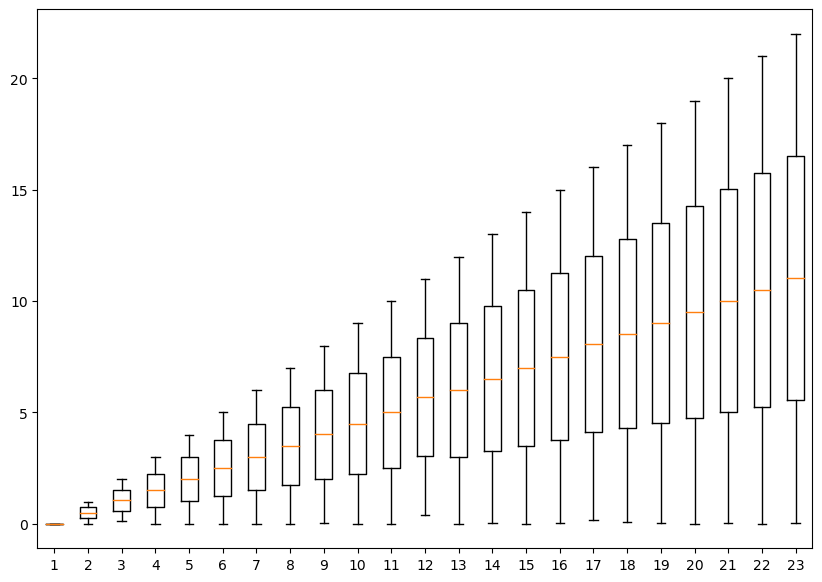

In [93]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
data = topicsPerMonth[0][2]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

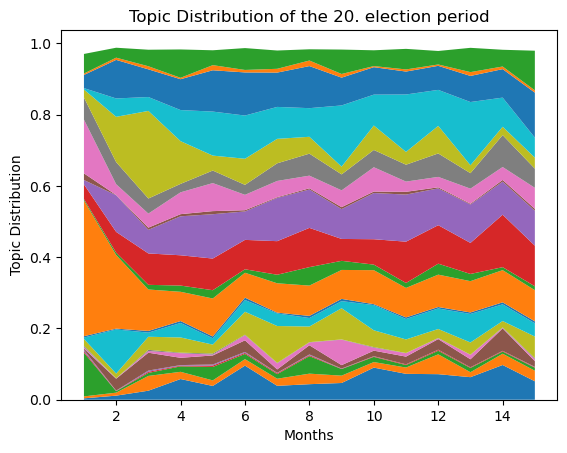

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def GroupTopics (topics, topicnumber):
    groupedTopic = []
    i = 0
    while i < len(topics):
        groupedTopic.append(topics[i][2][topicnumber][1])
        i += 1
    
    return groupedTopic

# Data
x = np.arange(1, 16, 1)
topic0 = GroupTopics(topicsPerMonth, 0)
topic1 = GroupTopics(topicsPerMonth, 1)
topic2 = GroupTopics(topicsPerMonth, 2)
topic3 = GroupTopics(topicsPerMonth, 3)
topic4 = GroupTopics(topicsPerMonth, 4)
topic5 = GroupTopics(topicsPerMonth, 5)
topic6 = GroupTopics(topicsPerMonth, 6)
topic7 = GroupTopics(topicsPerMonth, 7)
topic8 = GroupTopics(topicsPerMonth, 8)
topic9 = GroupTopics(topicsPerMonth, 9)
topic10 = GroupTopics(topicsPerMonth, 10)
topic11 = GroupTopics(topicsPerMonth, 11)
topic12 = GroupTopics(topicsPerMonth, 12)
topic13 = GroupTopics(topicsPerMonth, 13)
topic14 = GroupTopics(topicsPerMonth, 14)
topic15 = GroupTopics(topicsPerMonth, 15)
topic16 = GroupTopics(topicsPerMonth, 16)
topic17 = GroupTopics(topicsPerMonth, 17)
topic18 = GroupTopics(topicsPerMonth, 18)
topic19 = GroupTopics(topicsPerMonth, 19)
topic20 = GroupTopics(topicsPerMonth, 20)
topic21 = GroupTopics(topicsPerMonth, 21)
topic22 = GroupTopics(topicsPerMonth, 22)

y = np.vstack([topic0, topic1, topic2,
              topic3, topic4, topic5,
              topic6, topic7, topic8,
              topic9, topic10, topic11,
              topic12, topic13, topic14,
              topic15, topic16, topic17,
              topic18, topic19, topic20,
              topic21, topic22])

# Stacked area plot
fig, ax = plt.subplots()

'''
ax.stackplot(x, y, labels = ["Topic 1", "Topic 2", "Topic 3",
                            "Topic 4", "Topic 5", "Topic 6",
                            "Topic 7", "Topic 8", "Topic 9",
                            "Topic 10", "Topic 11", "Topic 12",
                            "Topic 13", "Topic 14", "Topic 15",
                            "Topic 16", "Topic 17", "Topic 18",
                            "Topic 19", "Topic 20", "Topic 21",
                            "Topic 22", "Topic 23"])
ax.legend(loc = 'upper left')
'''

plt.title("Topic Distribution of the 20. election period")
plt.xlabel("Months")
plt.ylabel("Topic Distribution")

ax.stackplot(x, y)